# Меры разброса

### import

In [1]:
import pandas as pd
import numpy as np

bikes = pd.read_pickle('Data/BikesDataVars.pkl')
bikes.head(n=3)

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0


## video 3

### range

In [2]:
bikes_hour = pd.DataFrame(bikes.groupby('Hour')['Rental Count'].sum())

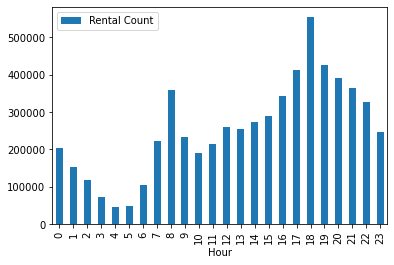

In [4]:
bikes_hour.plot(kind='bar');

In [6]:
bikes_hour.describe().T

,count,mean,std,min,25%,50%,75%,max
Rental Count,24.0,254252.458333,128710.527497,44836.0,180044.5,250500.5,346196.75,554429.0


In [7]:
# размах
bikes_hour['Rental Count'].max() - bikes_hour['Rental Count'].min()

509593

In [8]:
# интерквартильный размах
bikes_hour['Rental Count'].quantile(0.75) - bikes_hour['Rental Count'].quantile(0.25)

166152.25

In [10]:
# перцентили
print(np.percentile(bikes_hour['Rental Count'], 25))
print(np.quantile(bikes_hour['Rental Count'], 0.25))

180044.5
180044.5


### std

In [12]:
bikes_mean = bikes_hour['Rental Count'].mean()
deviations = bikes_hour['Rental Count'] - bikes_mean
sq_deviations = deviations ** 2
variance_samp = sq_deviations.sum() / (len(bikes_hour) - 1)
std_samp = np.sqrt(variance_samp)
print('variance_samp = ', variance_samp)
print('std_samp =', std_samp)

variance_samp =  16566399888.43297
std_samp = 128710.52749652209


In [13]:
print(bikes_hour['Rental Count'].var())
print(np.sqrt(bikes_hour['Rental Count'].var()))
print(bikes_hour['Rental Count'].std())

16566399888.432972
128710.5274965221
128710.5274965221


In [14]:
variance_pop = sq_deviations.sum() / (len(bikes_hour))
print(variance_pop)
print(np.sqrt(variance_pop))

15876133226.41493
126000.52867514061


In [15]:
print(bikes_hour['Rental Count'].var(ddof=0))
print(bikes_hour['Rental Count'].std(ddof=0))

15876133226.414932
126000.52867514061


In [17]:
bikes.groupby(by='Hour')['Rental Count'].std()

Hour
0      455.016192
1      338.058896
2      268.797389
3      162.601701
4      106.375778
5      113.191916
6      273.636723
7      582.515881
8      871.005983
9      500.018849
10     415.278139
11     452.773454
12     538.838247
13     539.252891
14     613.267340
15     631.989742
16     744.642450
17     935.173622
18    1286.770715
19    1088.371072
20     995.999725
21     916.900635
22     787.161188
23     581.424225
Name: Rental Count, dtype: float64

In [18]:
bikes.groupby('Hour')['Rental Count'].agg(['mean', 'std'])

,mean,std
Hour,,
0,558.178082,455.016192
1,415.720548,338.058896
2,319.767123,268.797389
3,201.010959,162.601701
4,122.838356,106.375778
5,135.863014,113.191916
6,283.654795,273.636723
7,612.646575,582.515881
8,979.838356,871.005983


In [25]:
def range_values(x):
    return x.max() - x.min()


bikes.pivot_table(index='Hour', 
                  values=['Temperature', 'Rental Count'],
                  aggfunc=['mean', 'std', 'var', range_values])

mean                      std                       var  \
     Rental Count Temperature Rental Count Temperature  Rental Count   
Hour                                                                   
0      558.178082   11.253652   455.016192   11.437803  2.070397e+05   
1      415.720548   10.972145   338.058896   11.391632  1.142838e+05   
2      319.767123   10.542535   268.797389   11.411300  7.225204e+04   
3      201.010959   10.355462   162.601701   11.306762  2.643931e+04   
4      122.838356   10.069859   106.375778   11.284178  1.131581e+04   
5      135.863014    9.849580   113.191916   11.310231  1.281241e+04   
6      283.654795    9.763944   273.636723   11.323973  7.487706e+04   
7      612.646575    9.454062   582.515881   11.487845  3.393248e+05   
8      979.838356    9.988515   871.005983   11.931827  7.586514e+05   
9      642.136986   11.459669   500.018849   12.199029  2.500188e+05   
10     519.123288   12.766947   415.278139   12.148809  1.724559e+05   
11     585.336986   14.285434   452.773454   12.038602  2.050038e+05   
12     710.534247   15.417175   538.838247   11.929531  2.903467e+05   
13     700.706849   16.184765   539.252891   11.833386  2.907937e+05   
14     747.147945   16.862360   613.267340   11.825084  3.760968e+05   
15     796.084932   17.084358   631.989742   11.872539  3.994110e+05   
16     938.032877   16.821652   744.642450   11.798065  5.544924e+05   
17    1128.873973   16.325281   935.173622   12.080028  8.745497e+05   
18    1518.983562   15.255956  1286.770715   12.154047  1.655779e+06   
19    1168.328767   14.254062  1088.371072   11.847401  1.184552e+06   
20    1069.698630   13.394460   995.999725   11.656540  9.920155e+05   
21     997.942466   12.680165   916.900635   11.480006  8.407068e+05   
22     893.621918   12.281461   787.161188   11.480268  6.196227e+05   
23     671.898630   11.717416   581.424225   11.345552  3.380541e+05   

                 range_values              
     Temperature Rental Count Temperature  
Hour                                       
0     130.823339         2059        48.0  
1     129.769278         1485        47.8  
2     130.217762         1950        47.5  
3     127.842870          781        47.2  
4     127.332677          608        47.5  
5     127.921327          561        47.6  
6     128.232369         1577        47.9  
7     131.970580         2880        48.0  
8     142.368491         4438        49.6  
9     148.816319         2318        50.5  
10    147.593567         1740        50.9  
11    144.927933         2041        51.4  
12    142.313704         2239        51.2  
13    140.029017         2805        51.2  
14    139.832607         3163        50.8  
15    140.957178         3194        50.7  
16    139.194330         3671        50.6  
17    145.927077         4450        50.8  
18    147.720860         6012        50.8  
19    140.360917         5418        49.9  
20    135.874914         3857        48.8  
21    131.790545         4373        48.0  
22    131.796557         3432        48.1  
23    128.721555         2603        48.1